In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [29]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, -2:].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

[269981.28, 181363.595959596, 106348.3730621112, 73880.64496247195, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.83934915659, 21862.09267218289, 19672.07284901432]


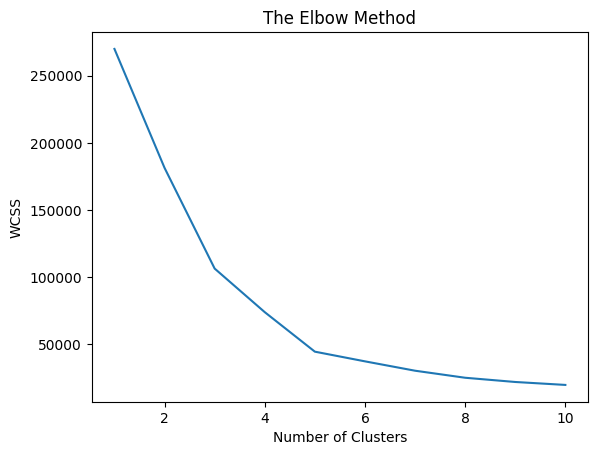

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=8)
    cluster.fit(X)
    wcss.append(cluster.inertia_)
print(wcss)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [31]:
selected_cluster = KMeans(n_clusters=5, init='k-means++', n_init=8, random_state=42)
y_kmeans = selected_cluster.fit_predict(X)

In [34]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


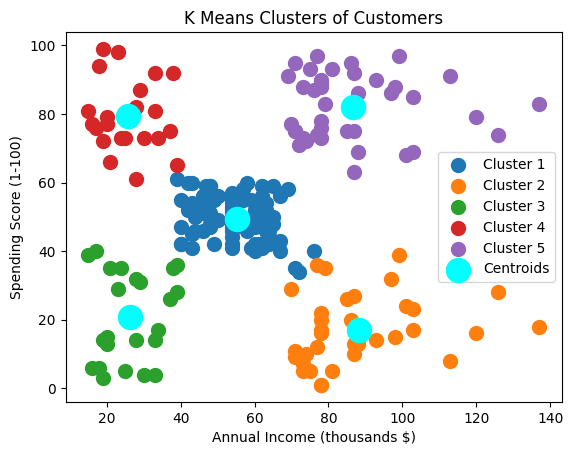

In [44]:
plt.scatter(X[y_kmeans==0, 0],  X[y_kmeans==0, 1], s = 100, label='Cluster 1')
plt.scatter(X[y_kmeans==1, 0],  X[y_kmeans==1, 1], s = 100, label='Cluster 2')
plt.scatter(X[y_kmeans==2, 0],  X[y_kmeans==2, 1], s = 100, label='Cluster 3')
plt.scatter(X[y_kmeans==3, 0],  X[y_kmeans==3, 1], s = 100, label='Cluster 4')
plt.scatter(X[y_kmeans==4, 0],  X[y_kmeans==4, 1], s = 100, label='Cluster 5')
plt.scatter(selected_cluster.cluster_centers_[:, 0], selected_cluster.cluster_centers_[:, 1], s = 300, color='cyan', label='Centroids')
plt.legend()
plt.title('K Means Clusters of Customers')
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (thousands $)')
plt.show()